## Importer les bibliothèques nécessaires

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Charger les données

In [230]:
# Lire les données depuis un fichier CSV avec ';' comme séparateur
df = pd.read_csv('velib-disponibilite-en-temps-reel.csv', sep=';')


In [231]:
print (df)

     Identifiant station                             Nom station  \
0                  12109                         Mairie du 12ème   
1                  16107           Benjamin Godard - Victor Hugo   
2                  14111             Cassini - Denfert-Rochereau   
3                  32304                      Charcot - Benfleet   
4                  14014                Jourdan - Stade Charléty   
...                  ...                                     ...   
1480                1003                    Saint-Denis - Rivoli   
1481                8002       Gare Saint-Lazare - Cour du Havre   
1482                1022       Danielle Casanova - Place Vendôme   
1483               13123  BNF - Bibliothèque Nationale de France   
1484               21404           Jean Jaurès - Gare de Clamart   

     Station en fonctionnement  Capacité de la station  \
0                          OUI                    30.0   
1                          OUI                    35.0   
2        

## Exploration initiale des données

#### Aperçu des données

In [232]:
# Afficher les premières lignes du dataset
print(df.head())

  Identifiant station                    Nom station  \
0               12109                Mairie du 12ème   
1               16107  Benjamin Godard - Victor Hugo   
2               14111    Cassini - Denfert-Rochereau   
3               32304             Charcot - Benfleet   
4               14014       Jourdan - Stade Charléty   

  Station en fonctionnement  Capacité de la station  Nombre bornettes libres  \
0                       OUI                    30.0                        2   
1                       OUI                    35.0                       33   
2                       OUI                    25.0                       22   
3                       NON                     0.0                        0   
4                       OUI                    60.0                       50   

   Nombre total vélos disponibles  Vélos mécaniques disponibles  \
0                              26                            22   
1                               1               

In [233]:
# Afficher les informations générales sur le dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Identifiant station             1485 non-null   object 
 1   Nom station                     1481 non-null   object 
 2   Station en fonctionnement       1485 non-null   object 
 3   Capacité de la station          1481 non-null   float64
 4   Nombre bornettes libres         1485 non-null   int64  
 5   Nombre total vélos disponibles  1485 non-null   int64  
 6   Vélos mécaniques disponibles    1485 non-null   int64  
 7   Vélos électriques disponibles   1485 non-null   int64  
 8   Borne de paiement disponible    1485 non-null   object 
 9   Retour vélib possible           1485 non-null   object 
 10  Actualisation de la donnée      1485 non-null   object 
 11  Coordonnées géographiques       1481 non-null   object 
 12  Nom communes équipées           14

In [234]:
# Statistiques descriptives
print(df.describe())

       Capacité de la station  Nombre bornettes libres  \
count             1481.000000              1485.000000   
mean                30.993923                18.123906   
std                 12.498134                13.515919   
min                  0.000000                 0.000000   
25%                 23.000000                 8.000000   
50%                 29.000000                17.000000   
75%                 37.000000                26.000000   
max                 76.000000               200.000000   

       Nombre total vélos disponibles  Vélos mécaniques disponibles  \
count                     1485.000000                   1485.000000   
mean                        11.945455                      7.539394   
std                         11.567119                      9.857097   
min                          0.000000                      0.000000   
25%                          4.000000                      1.000000   
50%                          8.000000              

In [235]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Capacité de la station,1481.0,30.993923,12.498134,0.0,23.0,29.0,37.0,76.0
Nombre bornettes libres,1485.0,18.123906,13.515919,0.0,8.0,17.0,26.0,200.0
Nombre total vélos disponibles,1485.0,11.945455,11.567119,0.0,4.0,8.0,17.0,64.0
Vélos mécaniques disponibles,1485.0,7.539394,9.857097,0.0,1.0,4.0,11.0,61.0
Vélos électriques disponibles,1485.0,4.406061,4.300234,0.0,1.0,3.0,6.0,34.0
Code INSEE communes équipées,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
#Afficher le nb de lignes et colonnes
velib.shape

(1485, 14)

In [237]:
# Obtenir le nombre de colonnes et ligne 
# le nombre de colonnes
num_columns = velib.shape[1]  # shape[1] donne le nombre de colonnes

# le nombre de lignes
num_lignes = velib.shape[0]  # shape[0] donne le nombre de lignes

# Afficher le nombre de lignes et de colonnes du DataFrame
print(f"Le DataFrame contient {num_columns} colonnes et {num_lignes} lignes.")


Le DataFrame contient 14 colonnes et 1485 lignes.


## Exploration initiale des données

#### Détection des valeurs manquantes

In [238]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values)


Valeurs manquantes par colonne :
Identifiant station                  0
Nom station                          4
Station en fonctionnement            0
Capacité de la station               4
Nombre bornettes libres              0
Nombre total vélos disponibles       0
Vélos mécaniques disponibles         0
Vélos électriques disponibles        0
Borne de paiement disponible         0
Retour vélib possible                0
Actualisation de la donnée           0
Coordonnées géographiques            4
Nom communes équipées                4
Code INSEE communes équipées      1485
dtype: int64


In [239]:
# Pourcentage de valeurs manquantes par colonne
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Identifiant station                 0.00000
Nom station                         0.26936
Station en fonctionnement           0.00000
Capacité de la station              0.26936
Nombre bornettes libres             0.00000
Nombre total vélos disponibles      0.00000
Vélos mécaniques disponibles        0.00000
Vélos électriques disponibles       0.00000
Borne de paiement disponible        0.00000
Retour vélib possible               0.00000
Actualisation de la donnée          0.00000
Coordonnées géographiques           0.26936
Nom communes équipées               0.26936
Code INSEE communes équipées      100.00000
dtype: float64


## Gestion des valeurs manquantes

In [240]:
df.head()

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Actualisation de la donnée,Coordonnées géographiques,Nom communes équipées,Code INSEE communes équipées
0,12109,Mairie du 12ème,OUI,30.0,2,26,22,4,OUI,OUI,2024-06-14T21:50:32+02:00,"48.840855311763, 2.3875549435616",Paris,NaN
1,16107,Benjamin Godard - Victor Hugo,OUI,35.0,33,1,0,1,OUI,OUI,2024-06-14T21:47:40+02:00,"48.865983, 2.275725",Paris,NaN
2,14111,Cassini - Denfert-Rochereau,OUI,25.0,22,3,0,3,OUI,OUI,2024-06-14T21:48:24+02:00,"48.837525839067, 2.3360354080796",Paris,NaN
3,32304,Charcot - Benfleet,NON,0.0,0,0,0,0,NON,NON,2024-03-29T10:30:37+01:00,"48.878370277021, 2.440523876268",Romainville,NaN
4,14014,Jourdan - Stade Charléty,OUI,60.0,50,10,1,9,OUI,OUI,2024-06-14T21:50:48+02:00,"48.819428333369, 2.3433353751898",Paris,NaN


In [241]:
df.isnull()

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Actualisation de la donnée,Coordonnées géographiques,Nom communes équipées,Code INSEE communes équipées
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1481,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1482,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1483,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Imputation par la valeur normalement attendue

In [242]:
# Imputation par la valeur normalement attendue
# Par exemple, remplacer les valeurs manquantes dans 'Identifiant station' par une valeur spécifique
df['Identifiant station'].fillna(99999, inplace=True)

# Pour 'Nom station', remplacer par une valeur constante ou une chaîne vide
df['Nom station'].fillna('Non spécifié', inplace=True)

# Pour 'Capacité de la station', remplacer par la moyenne ou la médiane
df['Capacité de la station'].fillna(df['Capacité de la station'].median(), inplace=True)

# Pour 'Nom communes équipées', remplacer par la valeur la plus fréquente (mode)
df['Nom communes équipées'].fillna(df['Nom communes équipées'].mode()[0], inplace=True)

print("DataFrame après imputation:")
print(df)


DataFrame après imputation:
     Identifiant station                             Nom station  \
0                  12109                         Mairie du 12ème   
1                  16107           Benjamin Godard - Victor Hugo   
2                  14111             Cassini - Denfert-Rochereau   
3                  32304                      Charcot - Benfleet   
4                  14014                Jourdan - Stade Charléty   
...                  ...                                     ...   
1480                1003                    Saint-Denis - Rivoli   
1481                8002       Gare Saint-Lazare - Cour du Havre   
1482                1022       Danielle Casanova - Place Vendôme   
1483               13123  BNF - Bibliothèque Nationale de France   
1484               21404           Jean Jaurès - Gare de Clamart   

     Station en fonctionnement  Capacité de la station  \
0                          OUI                    30.0   
1                          OUI         

In [243]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values)

Valeurs manquantes par colonne :
Identifiant station                  0
Nom station                          0
Station en fonctionnement            0
Capacité de la station               0
Nombre bornettes libres              0
Nombre total vélos disponibles       0
Vélos mécaniques disponibles         0
Vélos électriques disponibles        0
Borne de paiement disponible         0
Retour vélib possible                0
Actualisation de la donnée           0
Coordonnées géographiques            4
Nom communes équipées                0
Code INSEE communes équipées      1485
dtype: int64


### Manipulation des filtres 

In [244]:
def filter_by_column(df, column, condition):
  
    filtered_df = df[df[column].apply(lambda x: eval(f'x {condition}'))]
    return filtered_df


In [245]:
filtered_df = filter_by_column(df, 'Capacité de la station', '>= 20')
print(filtered_df.head())


  Identifiant station                    Nom station  \
0               12109                Mairie du 12ème   
1               16107  Benjamin Godard - Victor Hugo   
2               14111    Cassini - Denfert-Rochereau   
4               14014       Jourdan - Stade Charléty   
5               44015     Rouget de L'isle - Watteau   

  Station en fonctionnement  Capacité de la station  Nombre bornettes libres  \
0                       OUI                    30.0                        2   
1                       OUI                    35.0                       33   
2                       OUI                    25.0                       22   
4                       OUI                    60.0                       50   
5                       OUI                    20.0                        1   

   Nombre total vélos disponibles  Vélos mécaniques disponibles  \
0                              26                            22   
1                               1               

### GroupBy avec Comptage 

In [246]:
# GroupBy par ville avec comptage des stations en fonctionnement
count_df = df[df['Station en fonctionnement'] == 'OUI'].groupby('Nom communes équipées').size().reset_index(name='Nombre de stations en fonctionnement')

print("Nombre de stations en fonctionnement par ville:")
print(count_df)


Nombre de stations en fonctionnement par ville:
    Nom communes équipées  Nombre de stations en fonctionnement
0             Alfortville                                     5
1                 Arcueil                                     4
2              Argenteuil                                     6
3      Asnières-sur-Seine                                    12
4           Aubervilliers                                    13
..                    ...                                   ...
58          Ville-d'Avray                                     1
59              Villejuif                                    11
60  Villeneuve-la-Garenne                                     2
61              Vincennes                                    10
62        Vitry-sur-Seine                                    16

[63 rows x 2 columns]


### Création des deux nouvelles variables

In [247]:
# Création de la variable 'Taux d'occupation'
df['Taux d\'occupation'] = (df['Nombre total vélos disponibles'] / df['Capacité de la station']) * 100

# Création de la variable 'Proportion de vélos électriques'
df['Proportion de vélos électriques'] = (df['Vélos électriques disponibles'] / df['Nombre total vélos disponibles']) * 100


# Formater les colonnes en pourcentages avec deux décimales
df['Taux d\'occupation'] = df['Taux d\'occupation'].map('{:.2f}%'.format)
df['Proportion de vélos électriques'] = df['Proportion de vélos électriques'].map('{:.2f}%'.format)




In [248]:
df

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Actualisation de la donnée,Coordonnées géographiques,Nom communes équipées,Code INSEE communes équipées,Taux d'occupation,Proportion de vélos électriques
0,12109,Mairie du 12ème,OUI,30.0,2,26,22,4,OUI,OUI,2024-06-14T21:50:32+02:00,"48.840855311763, 2.3875549435616",Paris,NaN,86.67%,15.38%
1,16107,Benjamin Godard - Victor Hugo,OUI,35.0,33,1,0,1,OUI,OUI,2024-06-14T21:47:40+02:00,"48.865983, 2.275725",Paris,NaN,2.86%,100.00%
2,14111,Cassini - Denfert-Rochereau,OUI,25.0,22,3,0,3,OUI,OUI,2024-06-14T21:48:24+02:00,"48.837525839067, 2.3360354080796",Paris,NaN,12.00%,100.00%
3,32304,Charcot - Benfleet,NON,0.0,0,0,0,0,NON,NON,2024-03-29T10:30:37+01:00,"48.878370277021, 2.440523876268",Romainville,NaN,nan%,nan%
4,14014,Jourdan - Stade Charléty,OUI,60.0,50,10,1,9,OUI,OUI,2024-06-14T21:50:48+02:00,"48.819428333369, 2.3433353751898",Paris,NaN,16.67%,90.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,1003,Saint-Denis - Rivoli,OUI,43.0,3,48,39,9,OUI,OUI,2024-06-14T21:50:39+02:00,"48.859059340842, 2.3476943001151",Paris,NaN,111.63%,18.75%
1481,8002,Gare Saint-Lazare - Cour du Havre,OUI,45.0,6,39,30,9,OUI,OUI,2024-06-14T21:50:17+02:00,"48.875674400851, 2.3265598341823",Paris,NaN,86.67%,23.08%
1482,1022,Danielle Casanova - Place Vendôme,OUI,37.0,32,2,2,0,OUI,OUI,2024-06-14T21:49:43+02:00,"48.868266498223, 2.3304839059711",Paris,NaN,5.41%,0.00%
1483,13123,BNF - Bibliothèque Nationale de France,OUI,42.0,0,56,43,13,OUI,OUI,2024-06-14T21:50:37+02:00,"48.8350268238, 2.3760157451034",Paris,NaN,133.33%,23.21%


In [249]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(missing_values)

Valeurs manquantes par colonne :
Identifiant station                   0
Nom station                           0
Station en fonctionnement             0
Capacité de la station                0
Nombre bornettes libres               0
Nombre total vélos disponibles        0
Vélos mécaniques disponibles          0
Vélos électriques disponibles         0
Borne de paiement disponible          0
Retour vélib possible                 0
Actualisation de la donnée            0
Coordonnées géographiques             4
Nom communes équipées                 0
Code INSEE communes équipées       1485
Taux d'occupation                     0
Proportion de vélos électriques       0
dtype: int64


In [250]:
df.head()

,Identifiant station,Nom station,Station en fonctionnement,Capacité de la station,Nombre bornettes libres,Nombre total vélos disponibles,Vélos mécaniques disponibles,Vélos électriques disponibles,Borne de paiement disponible,Retour vélib possible,Actualisation de la donnée,Coordonnées géographiques,Nom communes équipées,Code INSEE communes équipées,Taux d'occupation,Proportion de vélos électriques
0,12109,Mairie du 12ème,OUI,30.0,2,26,22,4,OUI,OUI,2024-06-14T21:50:32+02:00,"48.840855311763, 2.3875549435616",Paris,NaN,86.67%,15.38%
1,16107,Benjamin Godard - Victor Hugo,OUI,35.0,33,1,0,1,OUI,OUI,2024-06-14T21:47:40+02:00,"48.865983, 2.275725",Paris,NaN,2.86%,100.00%
2,14111,Cassini - Denfert-Rochereau,OUI,25.0,22,3,0,3,OUI,OUI,2024-06-14T21:48:24+02:00,"48.837525839067, 2.3360354080796",Paris,NaN,12.00%,100.00%
3,32304,Charcot - Benfleet,NON,0.0,0,0,0,0,NON,NON,2024-03-29T10:30:37+01:00,"48.878370277021, 2.440523876268",Romainville,NaN,nan%,nan%
4,14014,Jourdan - Stade Charléty,OUI,60.0,50,10,1,9,OUI,OUI,2024-06-14T21:50:48+02:00,"48.819428333369, 2.3433353751898",Paris,NaN,16.67%,90.00%


## Visualisation des tendances 

### Histogrammes

C:\Users\med-a\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


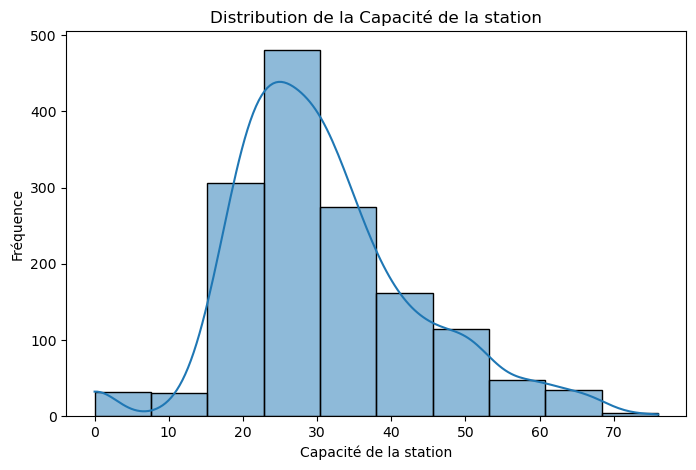

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme de la Capacité de la station
plt.figure(figsize=(8, 5))
sns.histplot(df['Capacité de la station'], bins=10, kde=True)
plt.title('Distribution de la Capacité de la station')
plt.xlabel('Capacité de la station')
plt.ylabel('Fréquence')
plt.show()


### Diagrammes circulaires (Pie charts)

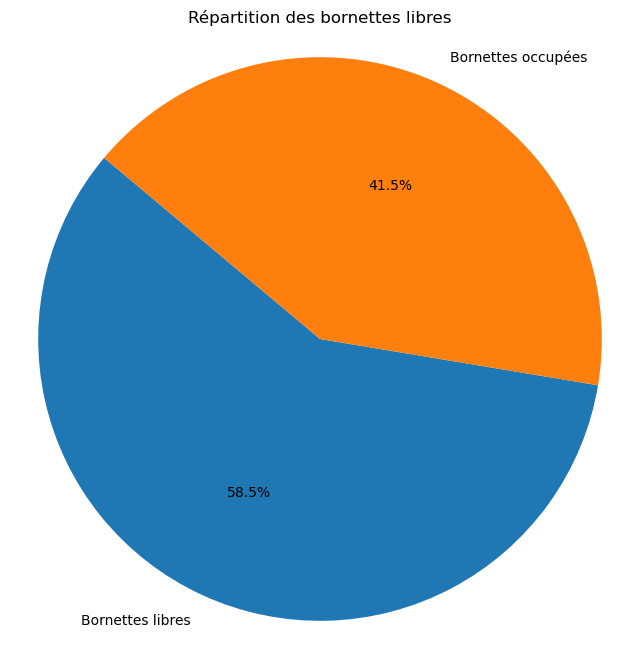

In [252]:
# Diagramme circulaire de la répartition des bornettes libres
plt.figure(figsize=(8, 8))
labels = ['Bornettes libres', 'Bornettes occupées']
sizes = [df['Nombre bornettes libres'].sum(), df['Capacité de la station'].sum() - df['Nombre bornettes libres'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des bornettes libres')
plt.axis('equal')
plt.show()


### Diagrammes de dispersion (Scatter plots)

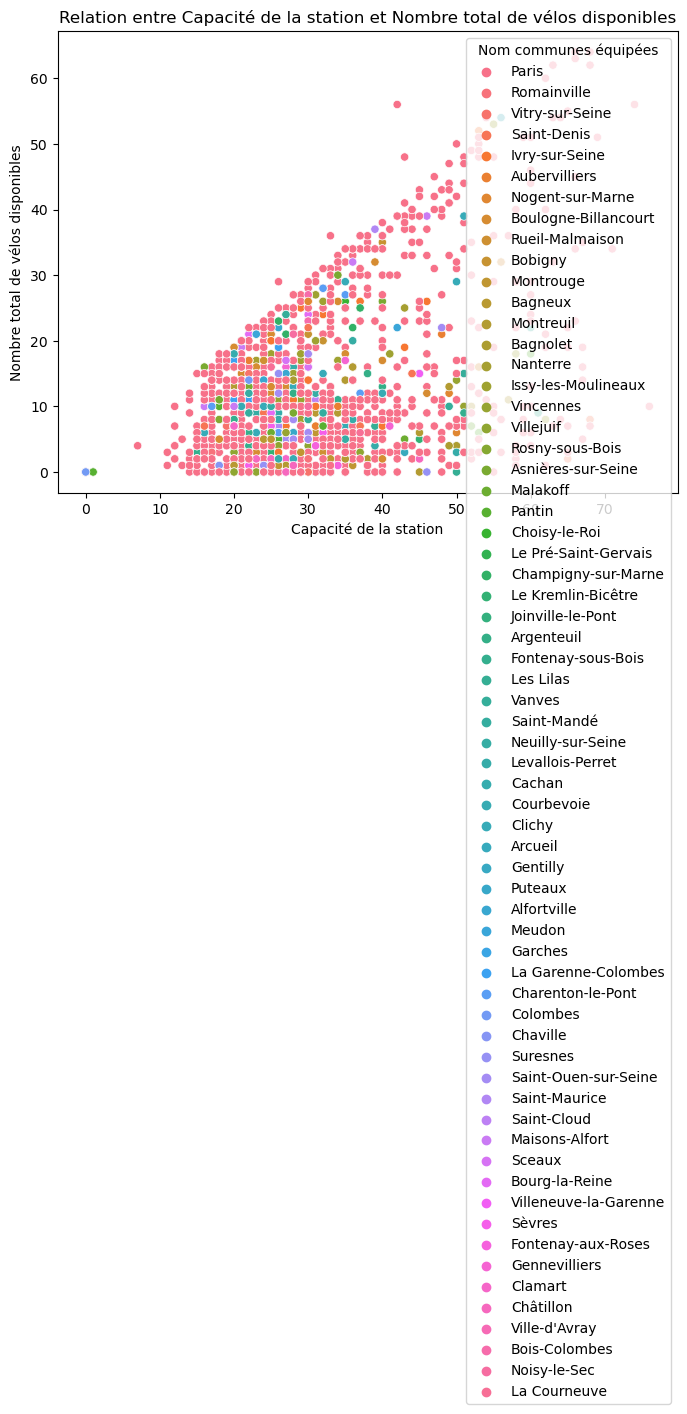

In [253]:
# Diagramme de dispersion entre Capacité de la station et Nombre total de vélos disponibles
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Capacité de la station', y='Nombre total vélos disponibles', hue='Nom communes équipées', sizes=(20, 100), legend='auto')
plt.title('Relation entre Capacité de la station et Nombre total de vélos disponibles')
plt.xlabel('Capacité de la station')
plt.ylabel('Nombre total de vélos disponibles')
plt.show()


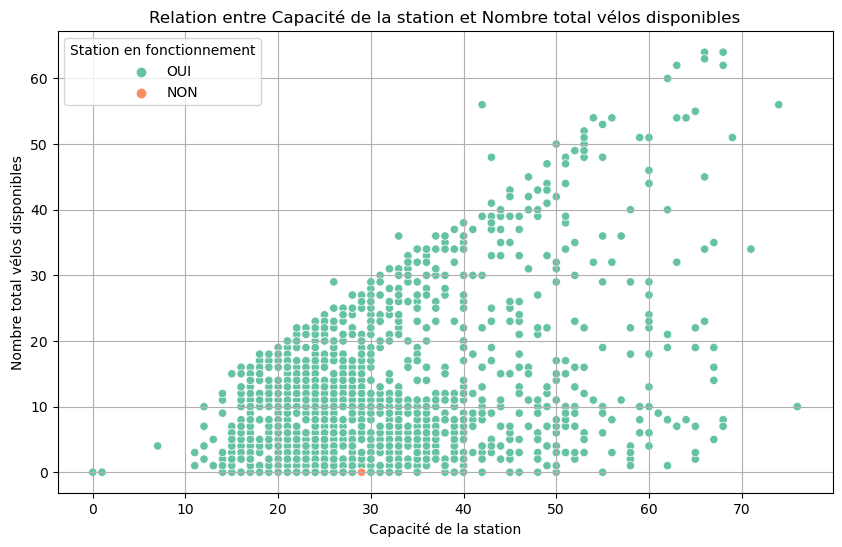

In [254]:
# Exemple : Relation entre Capacité de la station et Nombre total vélos disponibles
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Capacité de la station', y='Nombre total vélos disponibles', data=df, hue='Station en fonctionnement', palette='Set2')
plt.title('Relation entre Capacité de la station et Nombre total vélos disponibles')
plt.xlabel('Capacité de la station')
plt.ylabel('Nombre total vélos disponibles')
plt.legend(title='Station en fonctionnement')
plt.grid(True)
plt.show()


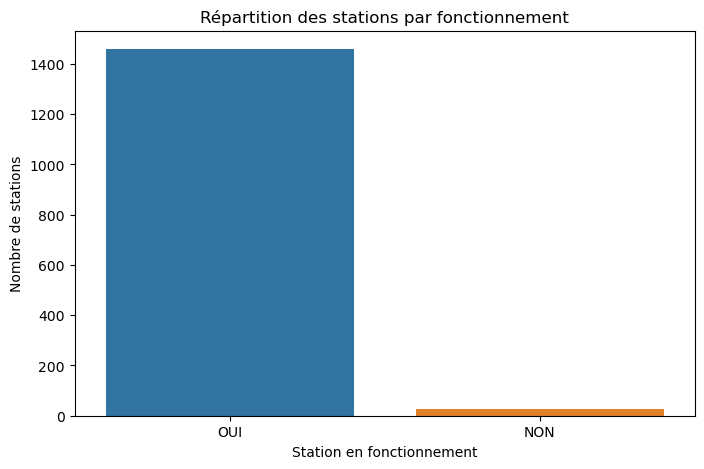

In [255]:
# Exemple pour la distribution de Station en fonctionnement
plt.figure(figsize=(8, 5))
sns.countplot(x='Station en fonctionnement', data=df)
plt.title('Répartition des stations par fonctionnement')
plt.xlabel('Station en fonctionnement')
plt.ylabel('Nombre de stations')
plt.show()

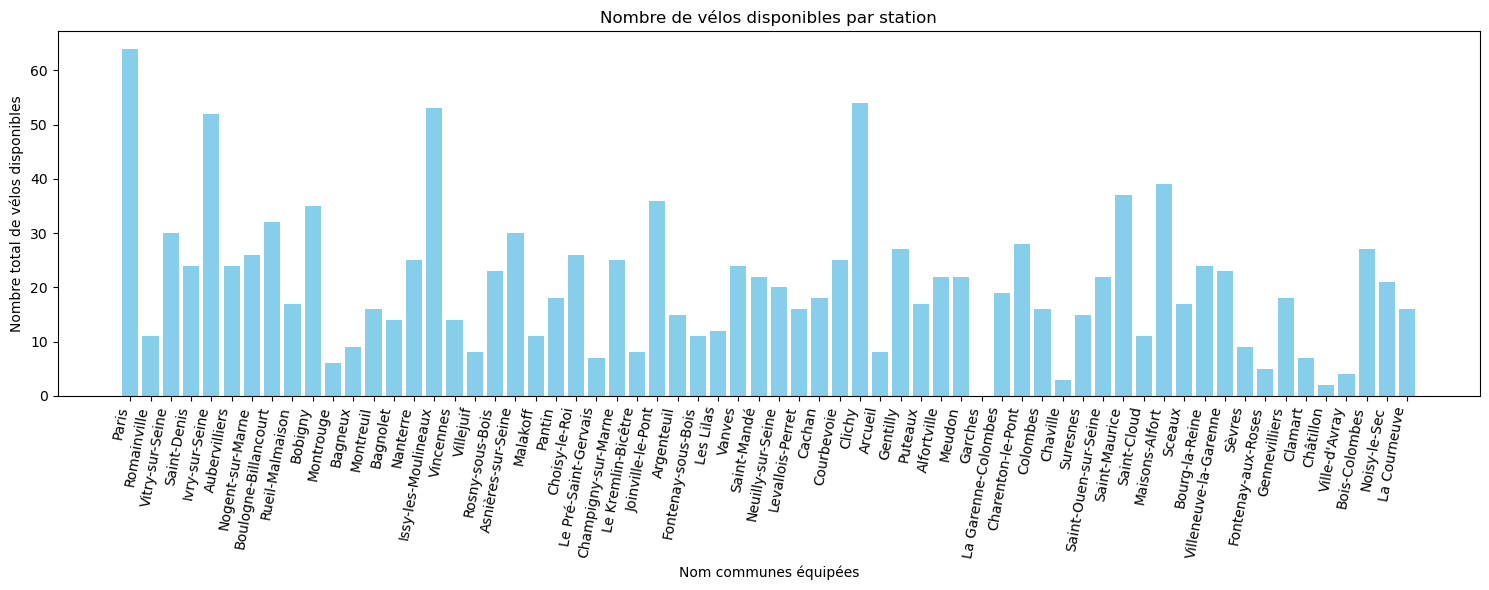

In [271]:
# Sélection des colonnes pour la visualisation
stations = df['Nom communes équipées']  # Assumant que 'Nom communes équipées' contient les noms des stations
vélos_disponibles = df['Nombre total vélos disponibles']

# Création du graphique à barres
plt.figure(figsize=(15, 6))
plt.bar(stations, vélos_disponibles, color='skyblue')
plt.xlabel('Nom communes équipées')
plt.ylabel('Nombre total de vélos disponibles')
plt.title('Nombre de vélos disponibles par station')
plt.xticks(rotation=80, ha='right')  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.tight_layout()

# Affichage du graphique
plt.show()


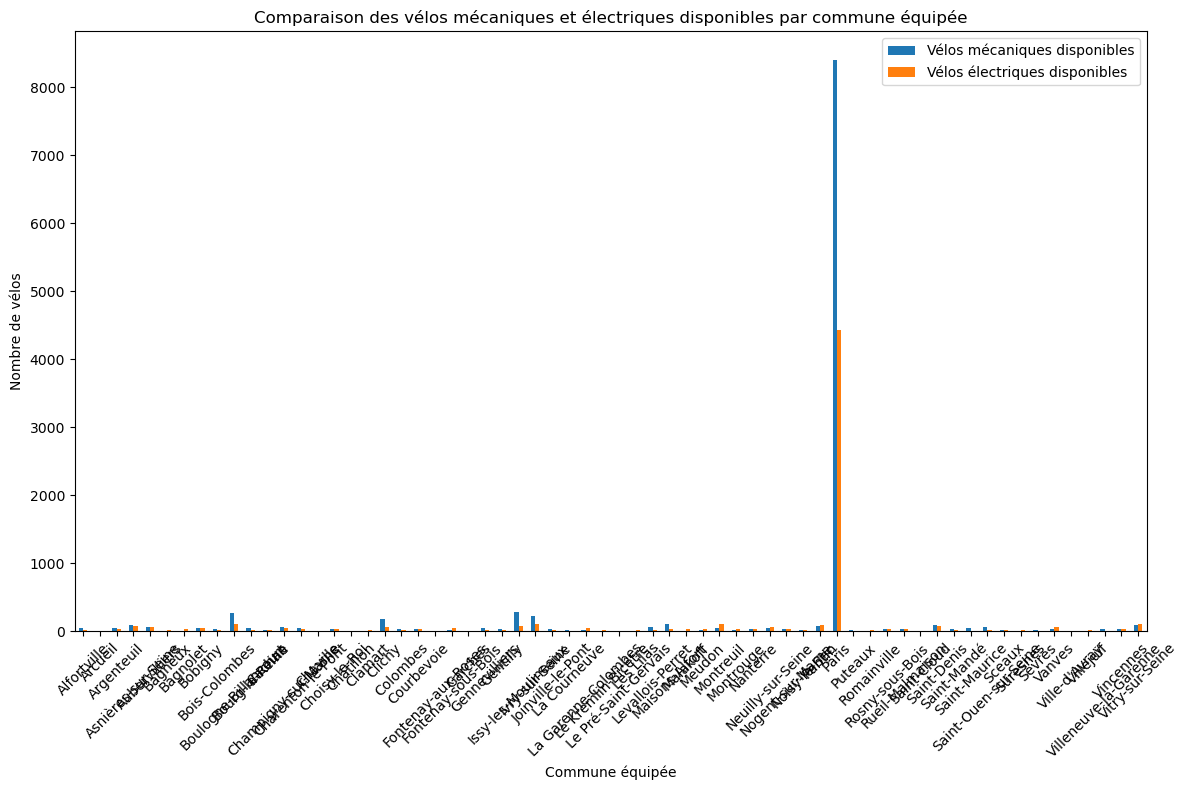

In [272]:
# Groupement des données par commune équipée
grouped = df.groupby('Nom communes équipées').sum()

# Sélection des colonnes pertinentes
grouped = grouped[['Vélos mécaniques disponibles', 'Vélos électriques disponibles']]

# Création du graphique
grouped.plot(kind='bar', figsize=(12, 8))
plt.title('Comparaison des vélos mécaniques et électriques disponibles par commune équipée')
plt.xlabel('Commune équipée')
plt.ylabel('Nombre de vélos')
plt.xticks(rotation=45)
plt.legend(['Vélos mécaniques disponibles', 'Vélos électriques disponibles'])
plt.tight_layout()
plt.show()


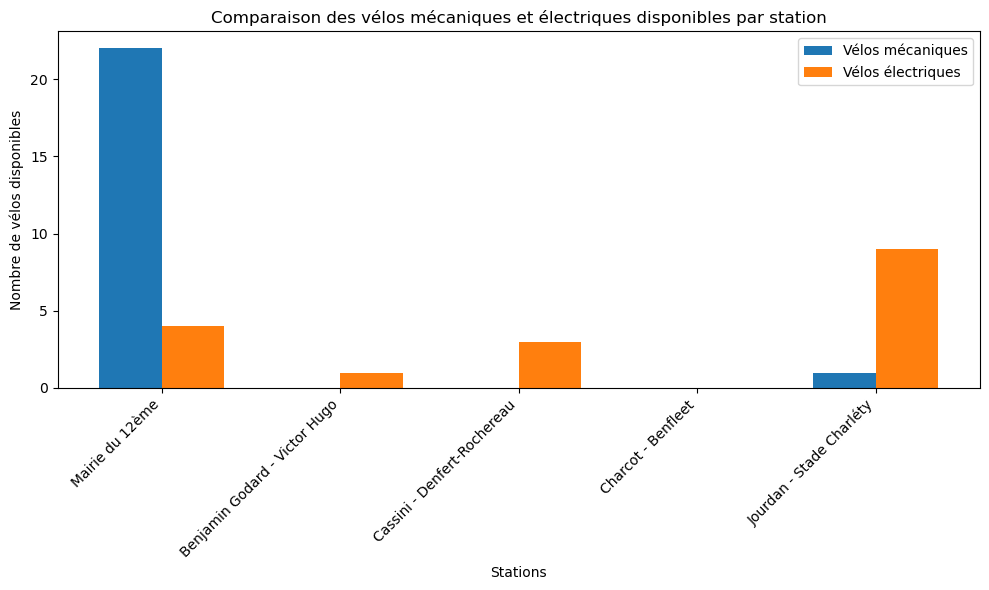

In [280]:

# Exemple de création d'un dataframe avec vos données
data = {
    'Identifiant station': [12109, 16107, 14111, 32304, 14014],
    'Nom station': ['Mairie du 12ème', 'Benjamin Godard - Victor Hugo', 'Cassini - Denfert-Rochereau', 'Charcot - Benfleet', 'Jourdan - Stade Charléty'],
    'Vélos mécaniques disponibles': [22, 0, 0, 0, 1],
    'Vélos électriques disponibles': [4, 1, 3, 0, 9]
}

df = pd.DataFrame(data)

# Sélection des données à visualiser
stations = df['Nom station']
velos_mecaniques = df['Vélos mécaniques disponibles']
velos_electriques = df['Vélos électriques disponibles']

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Largeur des barres
bar_width = 0.35

# Position des barres
bar_positions = range(len(stations))

# Création des barres pour vélos mécaniques
bars1 = ax.bar(bar_positions, velos_mecaniques, bar_width, label='Vélos mécaniques')

# Création des barres pour vélos électriques
bars2 = ax.bar([p + bar_width for p in bar_positions], velos_electriques, bar_width, label='Vélos électriques')

# Réglages des axes et des titres
ax.set_xlabel('Stations')
ax.set_ylabel('Nombre de vélos disponibles')
ax.set_title('Comparaison des vélos mécaniques et électriques disponibles par station')
ax.set_xticks([p + bar_width / 2 for p in bar_positions])
ax.set_xticklabels(stations, rotation=45, ha='right')
ax.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()
